In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,753 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and dire

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 1. 데이터셋 불러오기

In [ ]:
import pandas as pd

In [ ]:
!pip -q install chardet

import chardet, pandas as pd

def detect_encoding(path, sample_bytes=100_000):
    with open(path, 'rb') as f:
        raw = f.read(sample_bytes)
    guess = chardet.detect(raw) or {}
    return guess.get('encoding'), guess.get('confidence')

def safe_read_csv(path, try_encodings=('utf-8-sig','cp949','euc-kr','utf-8','latin1'), **kwargs):
    # 1) chardet로 추정
    enc, conf = detect_encoding(path)
    tried = []
    if enc:
        try:
            df = pd.read_csv(path, encoding=enc, **kwargs)
            print(f"[OK] {path}  (chardet='{enc}', conf={conf})")
            return df
        except Exception as e:
            tried.append((enc, str(e)))
            print(f"[FAIL] {path}  (chardet='{enc}', conf={conf}) -> {e}")

    # 2) 준비된 후보 인코딩들로 순차 시도
    for enc in try_encodings:
        try:
            df = pd.read_csv(path, encoding=enc, **kwargs)
            print(f"[OK] {path}  (fallback='{enc}')")
            return df
        except Exception as e:
            tried.append((enc, str(e)))

    # 3) 마지막 수단: errors='replace'로 손실 허용 로드
    try:
        df = pd.read_csv(path, encoding=enc or 'latin1', errors='replace', **kwargs)
        print(f"[OK] {path}  (force='{enc or 'latin1'}', errors='replace') -> 일부 문자 대체")
        return df
    except Exception as e:
        print(f"[ERROR] {path} 로드 실패. 시도 내역:", tried)
        raise


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/5학년/JBIG/2학기/서울시각화경진대회/최종 데이터셋.csv')
df2 = pd.read_csv('/content/drive/MyDrive/5학년/JBIG/2학기/서울시각화경진대회/서울시 자치구_연령대별 1인가구수.csv')

#2. 히트맵

In [ ]:
df

,ㄱ,일반가구,1인가구,남자 1인가구,여성 1인가구,1인가구 비율,중증정신질환 등록회원 수,장기재원건수,노인여가복지시설,정신건강증진기관,고독사 발생 건수,복지 인프라 밀도,고독사 위험지수,1인 가구 1만명 당 고독사 위험지수,1인 가구 1만명 당 복지 인프라 밀도
0,강남구,226333,79274,34215,45059,35.025383,287,4,19,2,23,0.000265,0.029013,2.901330,2.649040
1,강동구,194369,65601,30163,35438,33.750752,149,5,4,5,52,0.000137,0.079267,7.926708,1.371930
2,강북구,130929,53705,24478,29227,41.018415,231,3,3,4,61,0.000130,0.113583,11.358347,1.303417
3,강서구,256036,106748,48113,58635,41.692574,182,8,14,8,81,0.000206,0.075880,7.587964,2.060929
4,관악구,264148,153605,81133,72472,58.151112,216,5,6,6,76,0.000078,0.049478,4.947756,0.781225
5,광진구,158609,72933,34586,38347,45.982889,171,2,6,6,41,0.000165,0.056216,5.621598,1.645346
6,구로구,171388,62632,30421,32211,36.543982,228,12,2,8,40,0.000160,0.063865,6.386512,1.596628
7,금천구,112676,53858,28311,25547,47.798999,180,6,14,3,51,0.000316,0.094693,9.469345,3.156448
8,노원구,205666,67182,28424,38758,32.665584,246,6,7,6,64,0.000194,0.095264,9.526361,1.935042
9,도봉구,129841,43347,19193,24154,33.384678,244,4,7,10,28,0.000392,0.064595,6.459501,3.921840


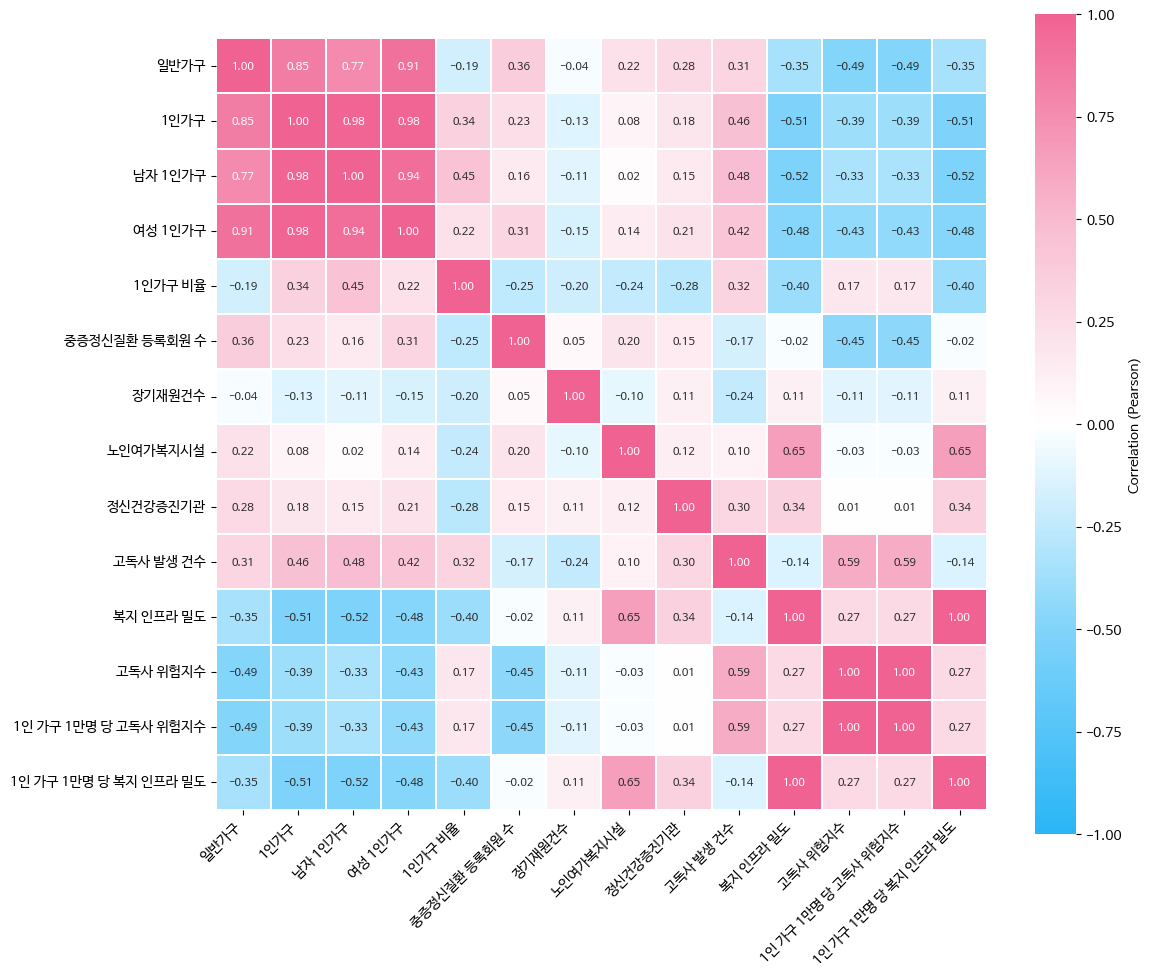

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 파일 경로
path = "/mnt/data/최종 데이터셋.csv"

# 2) 로드 (인코딩 추정)
for enc in ("utf-8-sig","utf-8","cp949","euc-kr"):
    try:
        df = pd.read_csv(path, encoding=enc)
        break
    except Exception:
        pass

# 3) 구 이름 컬럼 제거
gu_candidates = ["구","자치구명","시군구명","지역명","시군구"]
for c in gu_candidates:
    if c in df.columns:
        df = df.drop(columns=[c])
        break

# 4) 숫자 피처만 선택
num = df.select_dtypes(include="number").copy()
num = num.replace([np.inf, -np.inf], np.nan).fillna(0)

# 5) 상관행렬 계산
corr = num.corr(method='pearson')

import matplotlib.colors as mcolors

cmap_custom = mcolors.LinearSegmentedColormap.from_list(
    "sky_pink_div",
    [
        (0.0, "#29B6F6"),  # -1 → 진한 하늘
        (0.25, "#81D4FA"), # 중간쯤 → 밝은 하늘
        (0.5, "white"),    #  0 → 흰색
        (0.75, "#F8BBD0"), # 중간쯤 → 연분홍
        (1.0, "#F06292"),  # +1 → 분홍
    ]
)

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap=cmap_custom,
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True, fmt=".2f",
    annot_kws={"size":8},
    linewidths=.3,
    cbar_kws={"label": "Correlation (Pearson)"}
)
plt.title("", fontsize=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 파일 경로
path = "/mnt/data/최종 데이터셋.csv"

# 2) 로드 (인코딩 추정)
for enc in ("utf-8-sig","utf-8","cp949","euc-kr"):
    try:
        df = pd.read_csv(path, encoding=enc)
        break
    except Exception:
        pass

# 3) 구 이름 컬럼 제거
gu_candidates = ["구","자치구명","시군구명","지역명","시군구"]
for c in gu_candidates:
    if c in df.columns:
        df = df.drop(columns=[c])
        break

# 4) 보고 싶은 피처 리스트
selected_cols = [
  "1인가구 비율", "복지 인프라 밀도", "고독사 위험지수"
]

# 5) 숫자형만 선택 후 필요한 피처만 추출
num = df.select_dtypes(include="number").copy()
num = num.replace([np.inf, -np.inf], np.nan).fillna(0)
num = num[selected_cols]

# 6) 상관행렬 계산
corr = num.corr(method='pearson')

import matplotlib.colors as mcolors
import matplotlib.colors as mcolors



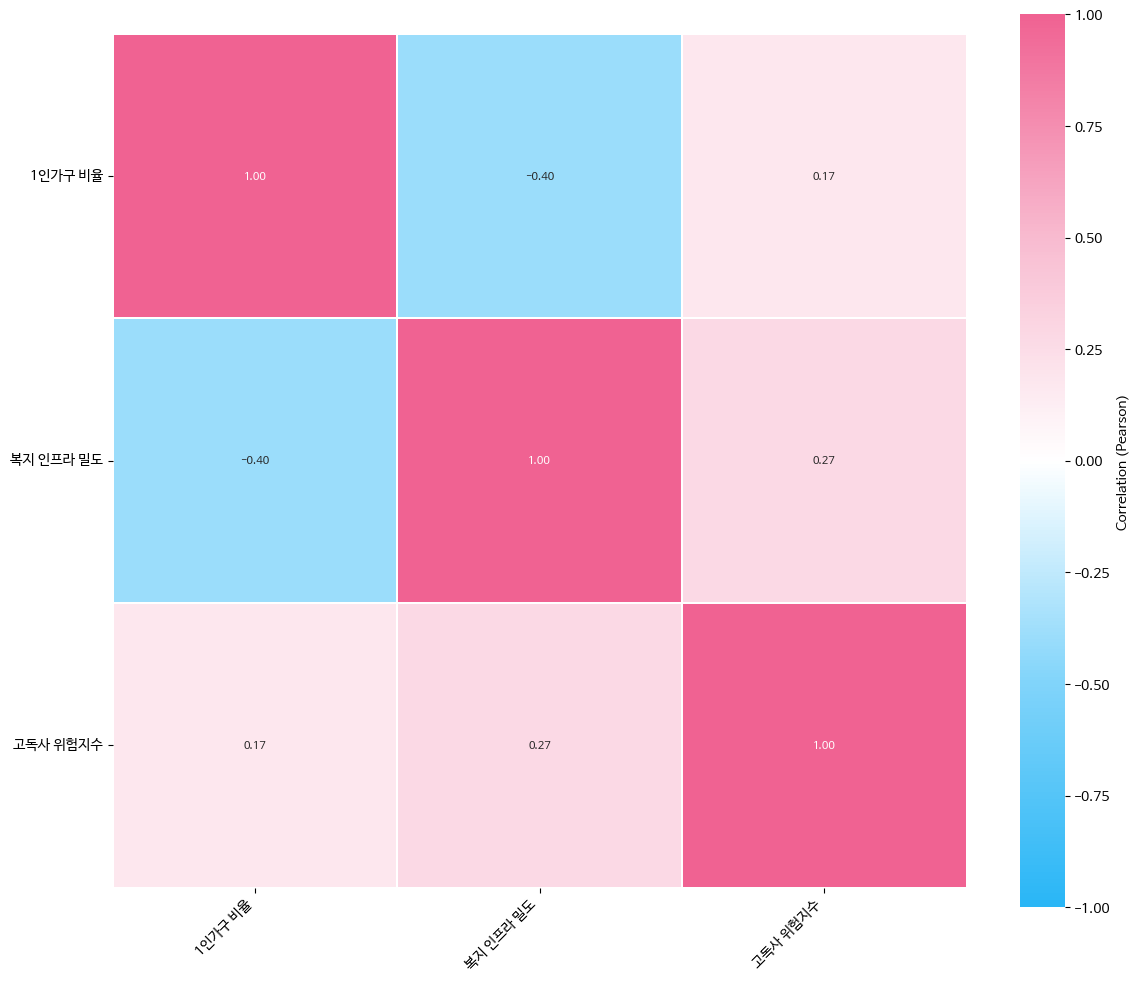

In [ ]:
import matplotlib.colors as mcolors

cmap_custom = mcolors.LinearSegmentedColormap.from_list(
    "sky_pink_div",
    [
        (0.0, "#29B6F6"),  # -1 → 진한 하늘
        (0.25, "#81D4FA"), # 중간쯤 → 밝은 하늘
        (0.5, "white"),    #  0 → 흰색
        (0.75, "#F8BBD0"), # 중간쯤 → 연분홍
        (1.0, "#F06292"),  # +1 → 분홍
    ]
)

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap=cmap_custom,
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True, fmt=".2f",
    annot_kws={"size":8},
    linewidths=.3,
    cbar_kws={"label": "Correlation (Pearson)"}
)
plt.title("", fontsize=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# 1) 피어슨 상관계수 행렬
corr = num.corr(method='pearson')

# 2) 모든 피처 쌍에 대해 상관계수 추출
pairs = []
for i, j in itertools.combinations(corr.columns, 2):
    r = corr.loc[i, j]
    if abs(r) >= 0.5:   # 기준: 절대값 0.5 이상
        pairs.append((i, j, r))

# 3) 상관계수 절댓값 기준으로 정렬
pairs_sorted = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)

print("상관계수 |r| ≥ 0.5인 변수쌍:")
for x, y, r in pairs_sorted:
    print(f"{x} vs {y} : r={r:.2f}")

# 4) 각 변수쌍 산점도+회귀선 그리기
for x, y, r in pairs_sorted:
    plt.figure(figsize=(6,5))
    sns.regplot(
        data=num, x=x, y=y,
        scatter_kws={'alpha':0.6},
        line_kws={'color':'red'}
    )
    plt.title(f"{x} vs {y} (r={r:.2f})")
    plt.tight_layout()
    plt.show()


상관계수 |r| ≥ 0.5인 변수쌍:


#3. 시각화

In [ ]:
# 예시: 터미널에서 아래 명령 실행
!git clone https://github.com/southkorea/seoul-maps.git


In [ ]:
pip install geopandas

In [ ]:
!pip install contextily


In [ ]:
!pip install mapclassify


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import contextily as cx

# 1) df_final 로드
df_final = pd.read_csv("/content/drive/MyDrive/5학년/JBIG/2학기/서울시각화경진대회/최종 데이터셋.csv")
df_final["구"] = df_final["ㄱ"].astype(str).str.strip()

# colormap 정의 (coolwarm: 파랑~하늘~흰~주황~빨강)
cmap = plt.colormaps.get_cmap("coolwarm")
cmap = mcolors.LinearSegmentedColormap.from_list(
    "skyred", ["skyblue", "red"]
)

In [ ]:
df

Basemap 생략: Stamen


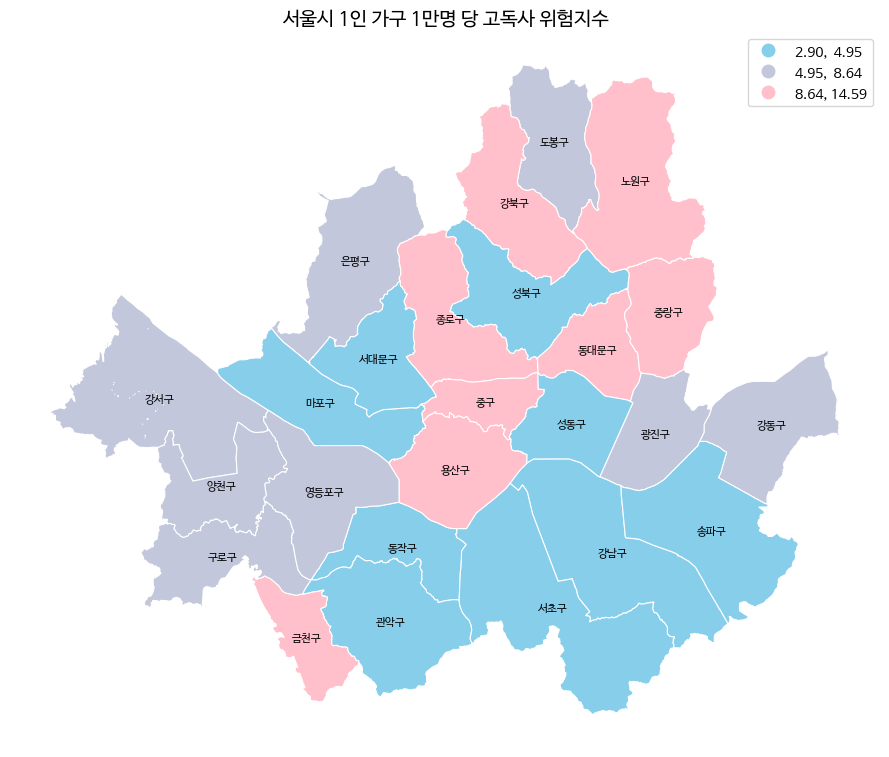

In [ ]:
gdf = gpd.read_file("seoul-maps/juso/2015/json/seoul_municipalities_geo.json")
gdf_merged = gdf.merge(df_final, left_on="SIG_KOR_NM", right_on="구", how="left")

if gdf_merged.crs is None:
    gdf_merged = gdf_merged.set_crs(epsg=4326)
if gdf_merged.crs.to_epsg() != 3857:
    gdf_merged = gdf_merged.to_crs(epsg=3857)

plt.rcParams["font.family"] = "NanumBarunGothic"
plt.rcParams["axes.unicode_minus"] = False

target_col = "1인 가구 1만명 당 고독사 위험지수"

# 2) 커스텀 컬러맵 (하늘색 → 빨강)
cmap = mcolors.LinearSegmentedColormap.from_list("skyred", ["skyblue", "pink"])

# 3) 시각화
fig, ax = plt.subplots(figsize=(9, 10))
gdf_merged.plot(
    column=target_col,
    cmap=cmap,
    legend=True,
    scheme="Quantiles",
    k=3,
    edgecolor="white",
    linewidth=0.8,
    ax=ax,
)

# 4) 구 이름 라벨
for idx, row in gdf_merged.iterrows():
    x = row["geometry"].centroid.x
    y = row["geometry"].centroid.y
    plt.text(
        x, y,
        row["SIG_KOR_NM"],
        fontsize=8, ha="center", va="center", color="black"
    )

# 5) 배경지도
try:
    cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, alpha=0.5)
except Exception as e:
    print("Basemap 생략:", e)

ax.set_title(f"서울시 {target_col}", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
df2.columns

Index(['자치구', '총합', '20세미만', '20~24세', '25~29세', '30~34세', '35~39세', '40~44세',
       '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세', '75~79세',
       '80~84세', '85세이상'],
      dtype='object')

Saved: ./서울시_일반가구.png


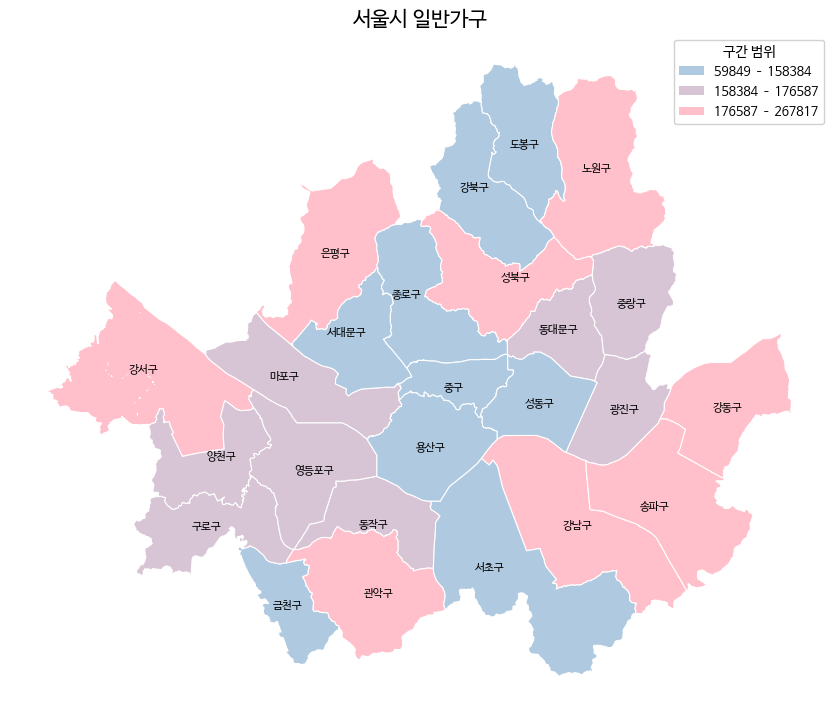

Saved: ./서울시_1인가구.png


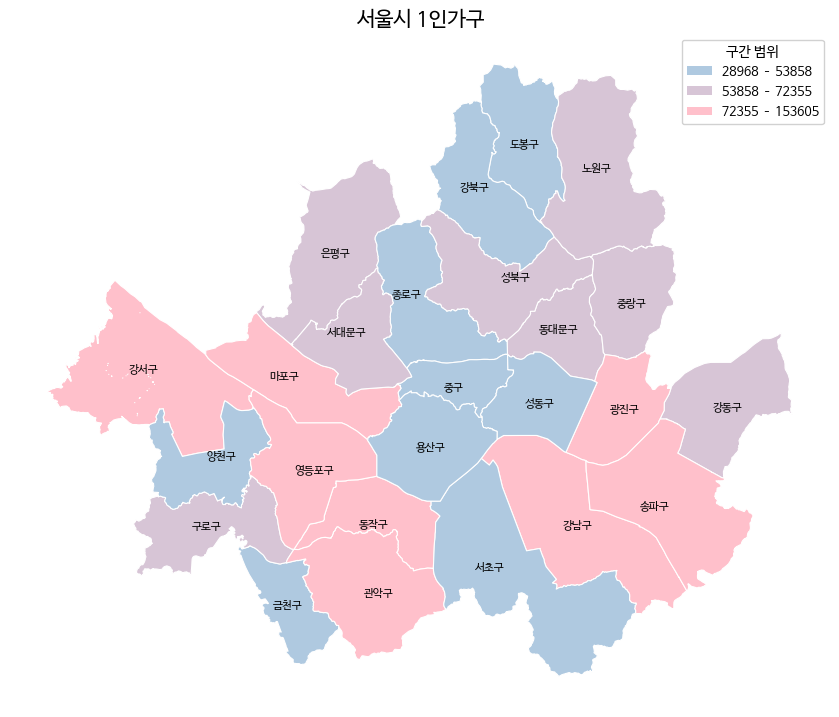

Saved: ./서울시_남자_1인가구.png


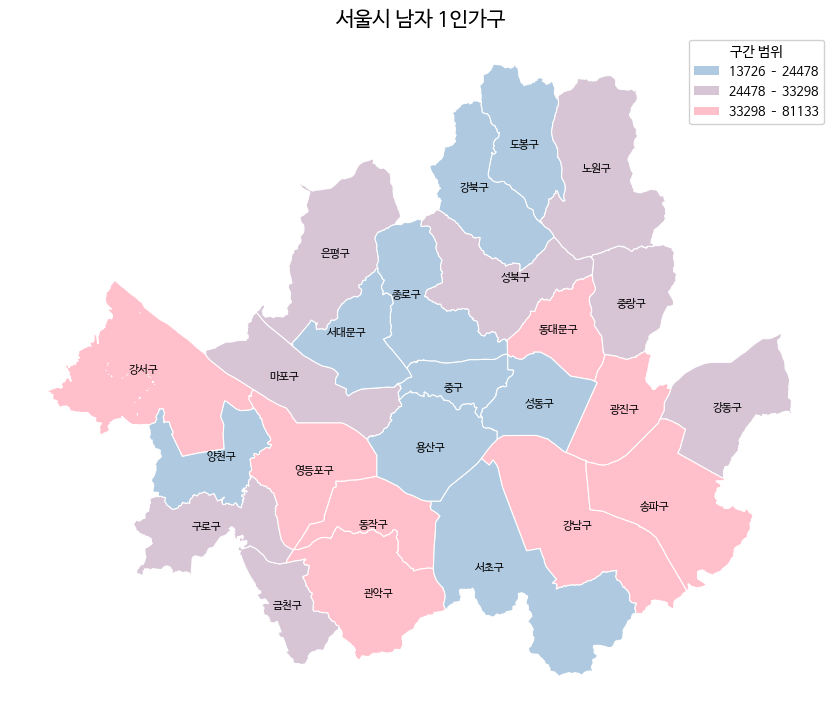

Saved: ./서울시_여성_1인가구.png


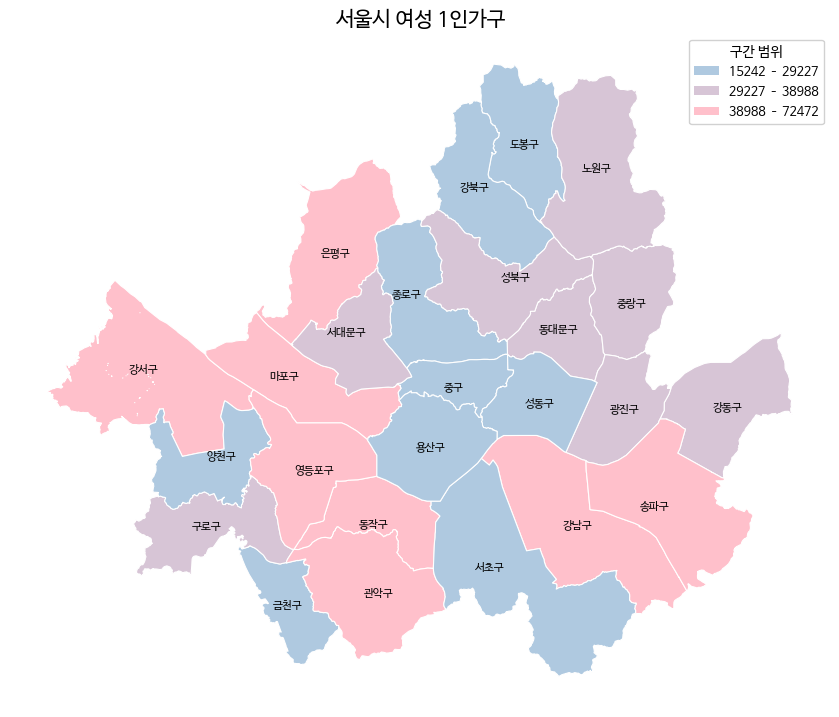

Saved: ./서울시_1인가구_비율.png


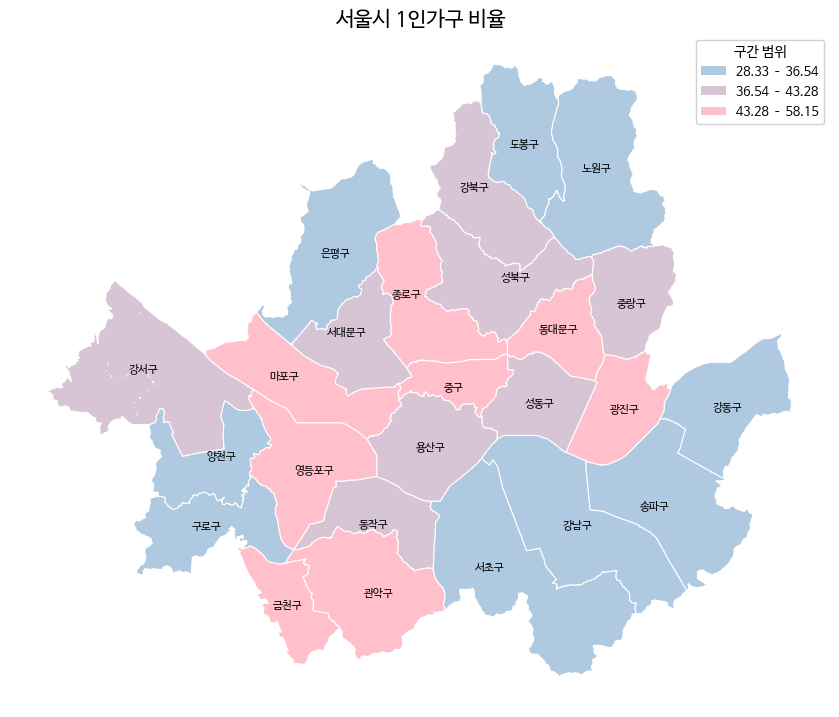

Saved: ./서울시_중증정신질환_등록회원_수.png


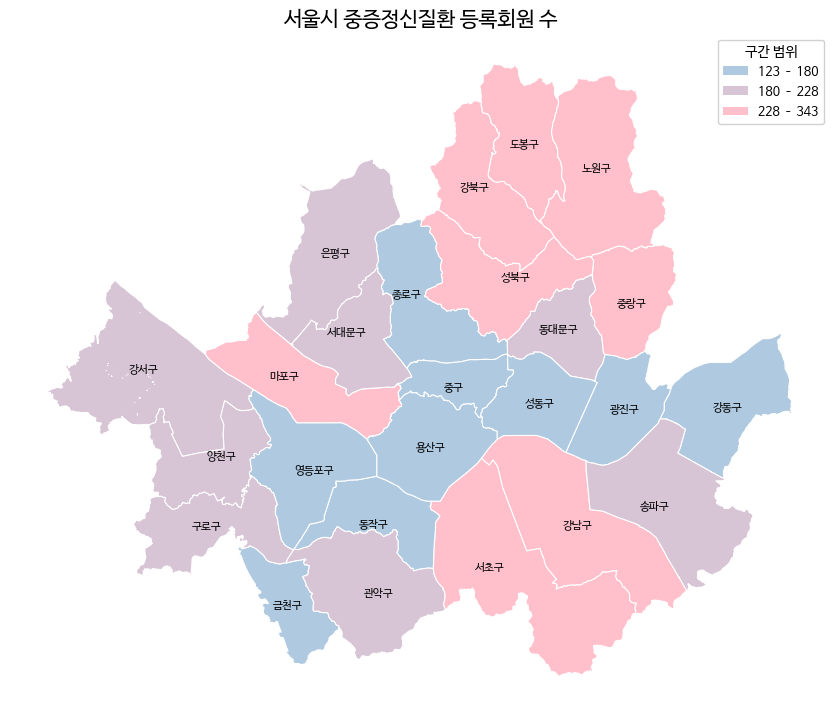

Saved: ./서울시_장기재원건수.png


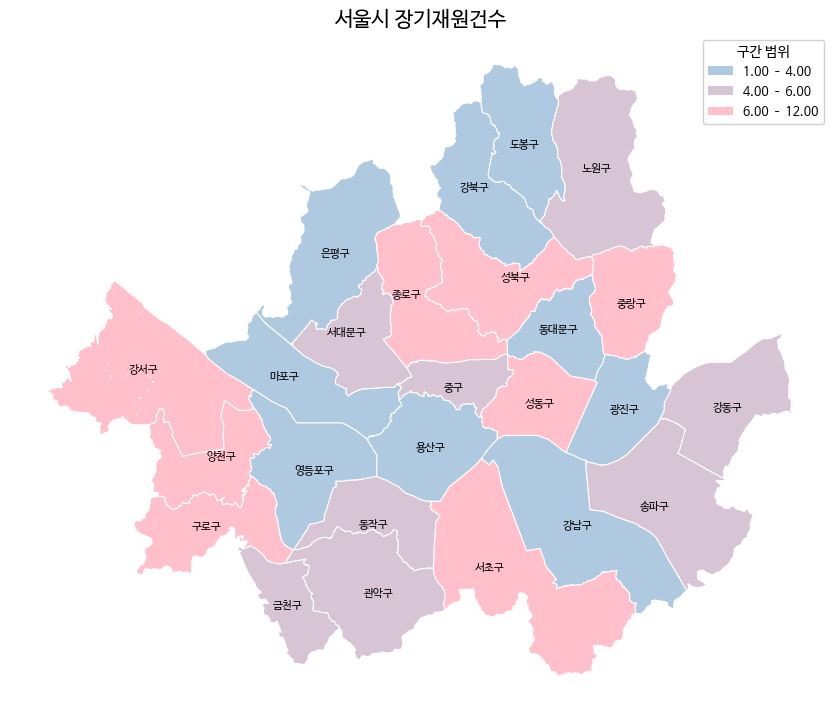

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import mapclassify
import contextily as cx
import re

# 개별 피처 목록
cols = [
    '일반가구', '1인가구', '남자 1인가구', '여성 1인가구', '1인가구 비율', '중증정신질환 등록회원 수','장기재원건수'
]

k = 3                 # 구간 수
save_png = True       # 이미지 파일 저장 여부
out_dir = "./"        # 저장 경로 (필요시 변경)

def slugify(s):
    return re.sub(r"[^\w\-]+", "_", s.strip())

for col in cols:
    y = gdf_merged[col].values.astype(float)

    # 구간화 (해당 피처 값만으로 5분위)
    q = mapclassify.Quantiles(y[~np.isnan(y)], k=k)
    bins = q.bins

    # bin index (NaN=-1)
    yb = np.full_like(y, -1, dtype=int)
    mask = ~np.isnan(y)
    yb[mask] = np.digitize(y[mask], bins, right=True)

    # 색상 (NaN은 회색)
    colors = [("#dddddd" if idx == -1 else cmap((idx+1)/k)) for idx in yb]

    # ---- 단일 그림 ----
    fig, ax = plt.subplots(figsize=(8.5, 9.5))

    gdf_merged.plot(ax=ax, color=colors, edgecolor="white", linewidth=0.8)

    # 배경지도(선택)
    try:
        cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, alpha=0.45)
    except Exception:
        pass

    # 구 이름 라벨
    for _, row in gdf_merged.iterrows():
        pt = row.geometry.representative_point()
        ax.text(pt.x, pt.y, row["SIG_KOR_NM"], fontsize=8,
                ha="center", va="center", color="black")

    ax.set_title(f"서울시 {col}", fontsize=15)
    ax.axis("off")

    # ---- 구간범위 상자(범례) ----
    low = np.nanmin(y)
    lefts = [low] + list(bins[:-1])
    rights = list(bins)
    rng = (np.nanmax(y) - np.nanmin(y)) if np.isfinite(np.nanmax(y) - np.nanmin(y)) else 0
    fmt = (lambda v: f"{v:.2f}") if rng < 100 else (lambda v: f"{v:.0f}")

    labels = [f"{fmt(L)} – {fmt(R)}" for L, R in zip(lefts, rights)]
    legend_colors = [cmap((i+1)/k) for i in range(k)]
    handles = [Patch(facecolor=legend_colors[i], edgecolor="none", label=labels[i]) for i in range(k)]

    leg = ax.legend(handles=handles, title="구간 범위",
                    loc="upper right", frameon=True, framealpha=0.9,
                    fontsize=9, title_fontsize=10)
    leg.get_frame().set_facecolor("white")

    plt.tight_layout()

    if save_png:
        out_path = f"{out_dir}서울시_{slugify(col)}.png"
        plt.savefig(out_path, dpi=200, bbox_inches="tight")
        print("Saved:", out_path)

    plt.show()
    plt.close(fig)


In [ ]:
df2.columns

Index(['자치구', '총합', '20세미만', '20~24세', '25~29세', '30~34세', '35~39세', '40~44세',
       '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세', '75~79세',
       '80~84세', '85세이상'],
      dtype='object')

Saved: ./서울시_총합.png


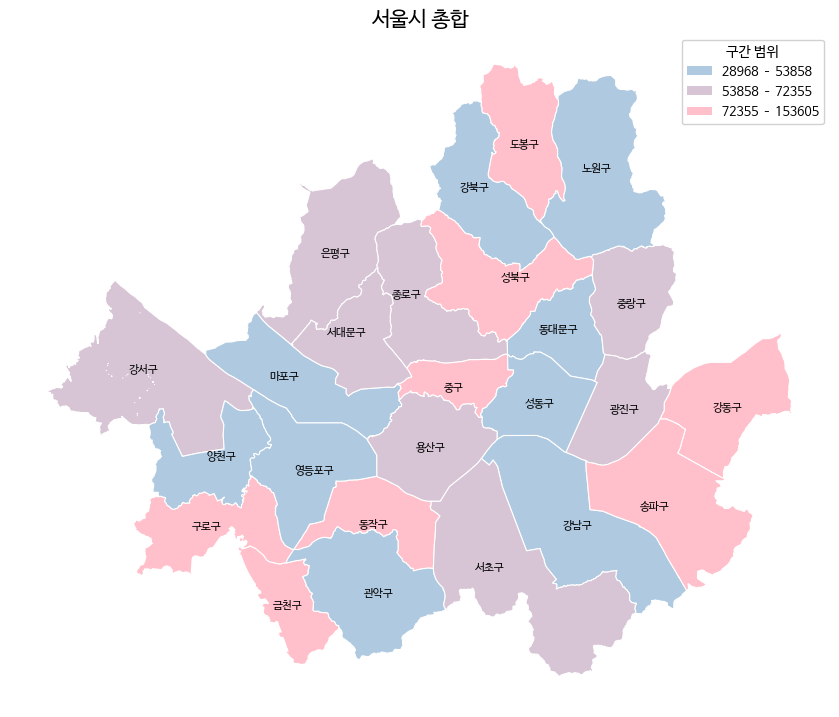

Saved: ./서울시_20세미만.png


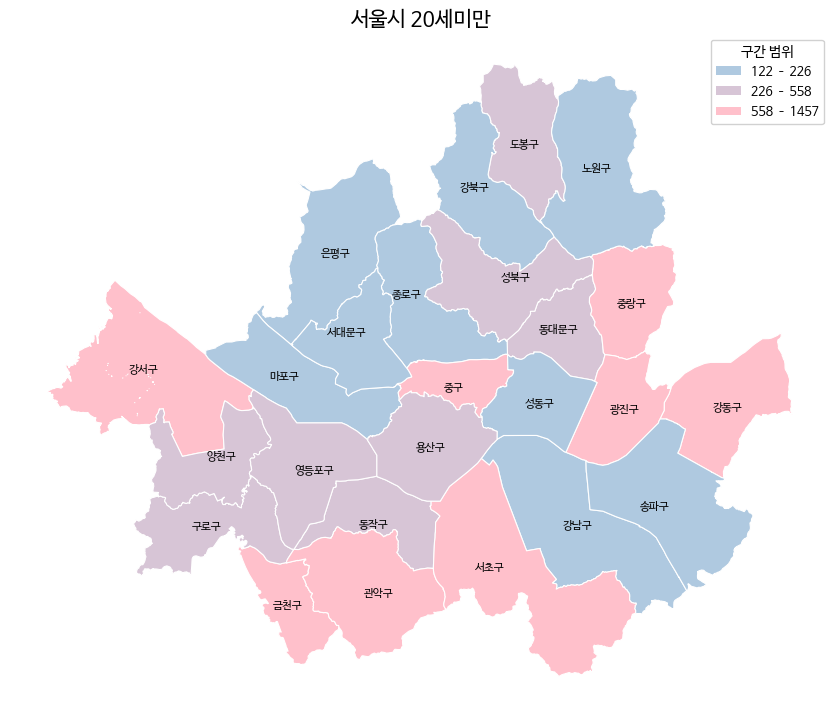

Saved: ./서울시_20_24세.png


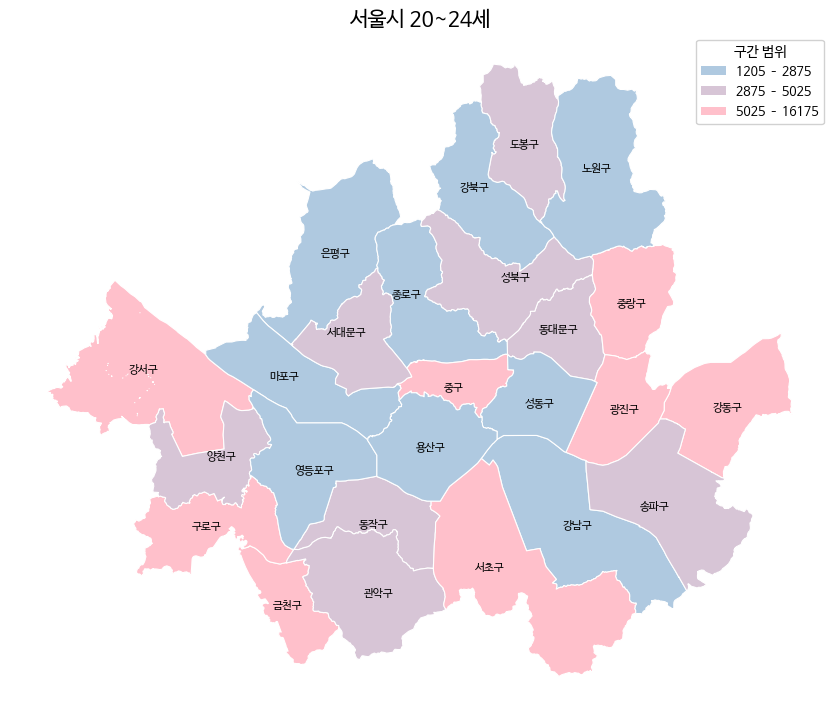

Saved: ./서울시_25_29세.png


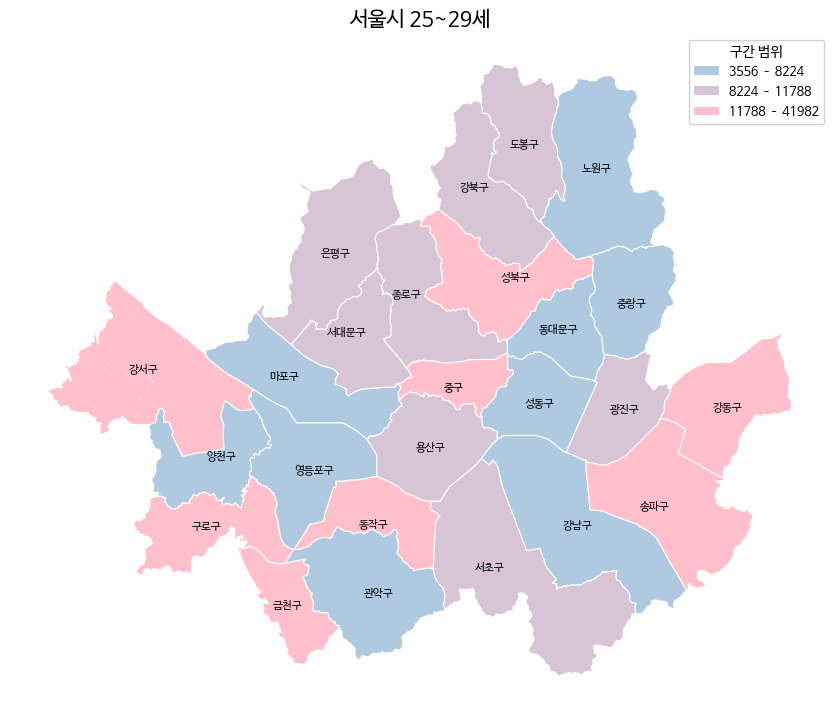

Saved: ./서울시_30_34세.png


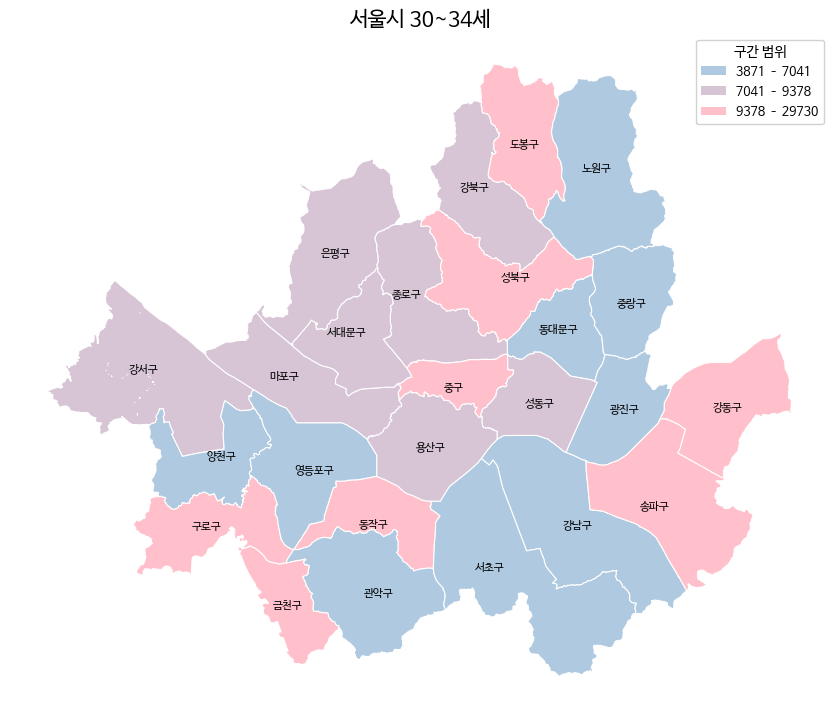

Saved: ./서울시_35_39세.png


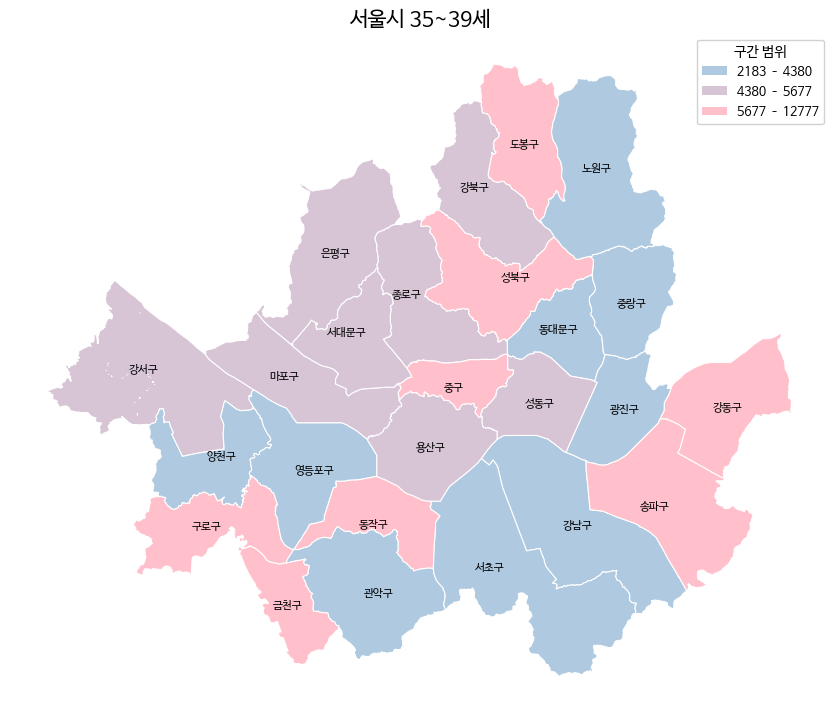

Saved: ./서울시_40_44세.png


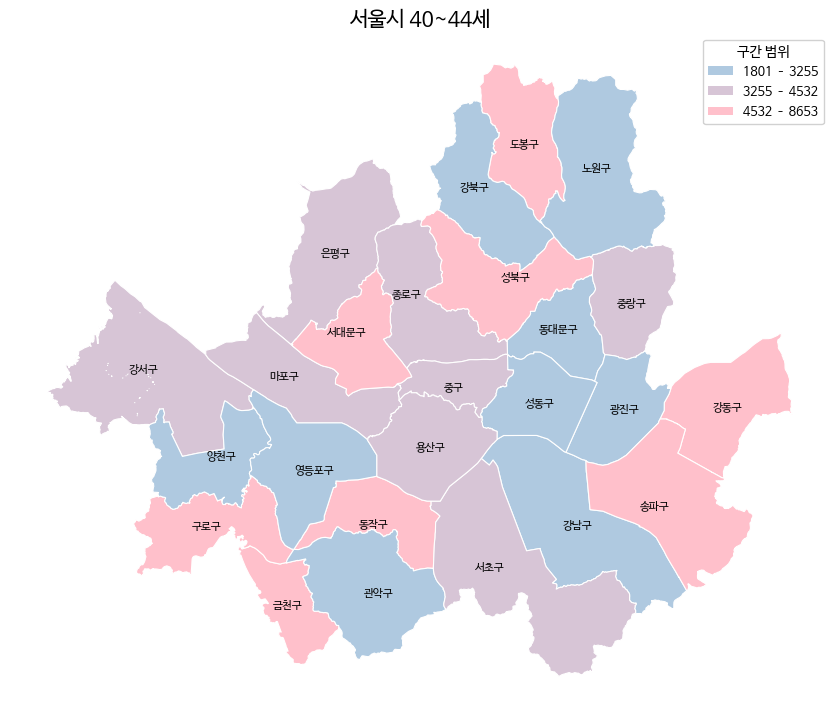

Saved: ./서울시_45_49세.png


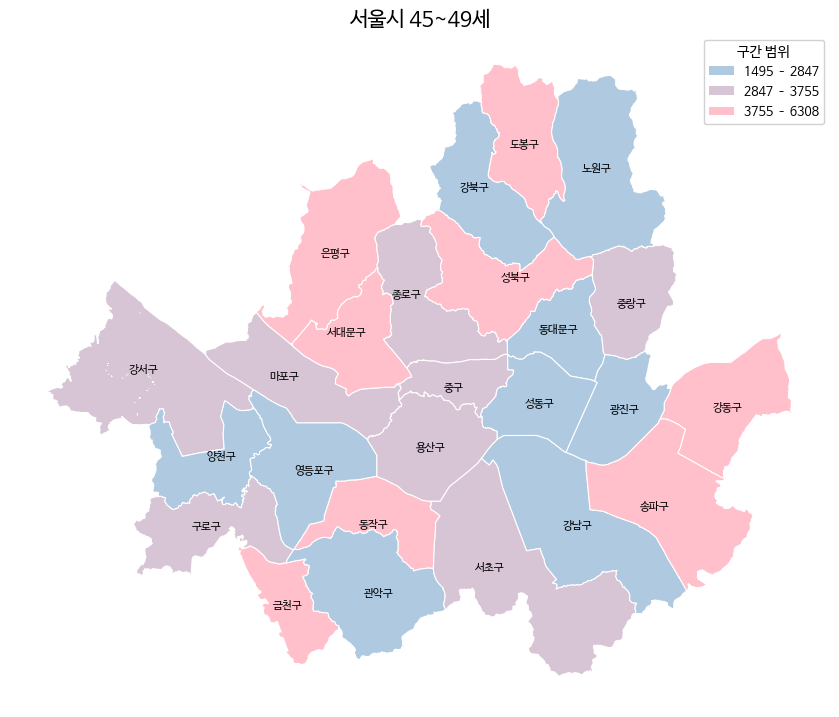

Saved: ./서울시_50_54세.png


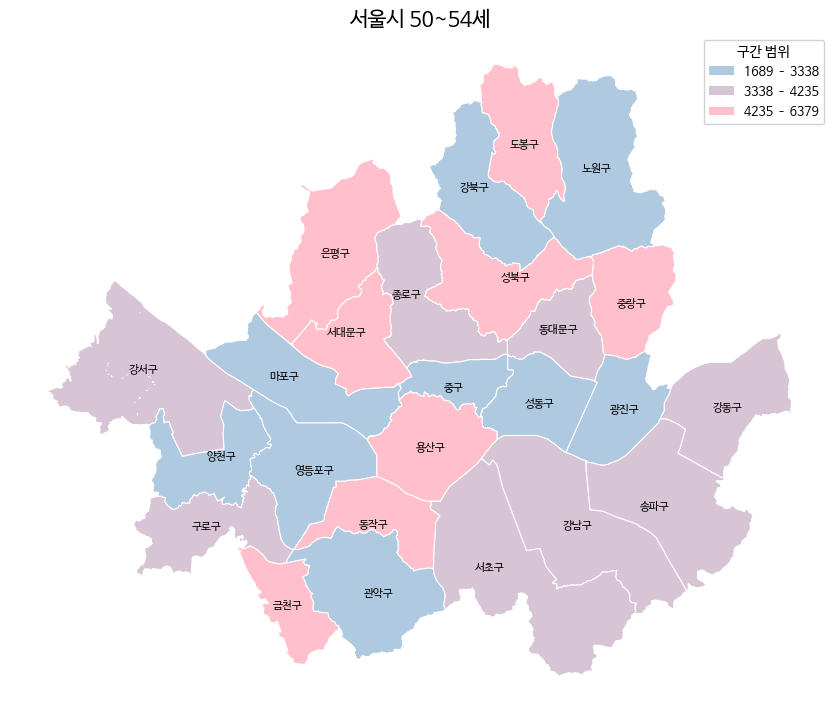

Saved: ./서울시_55_59세.png


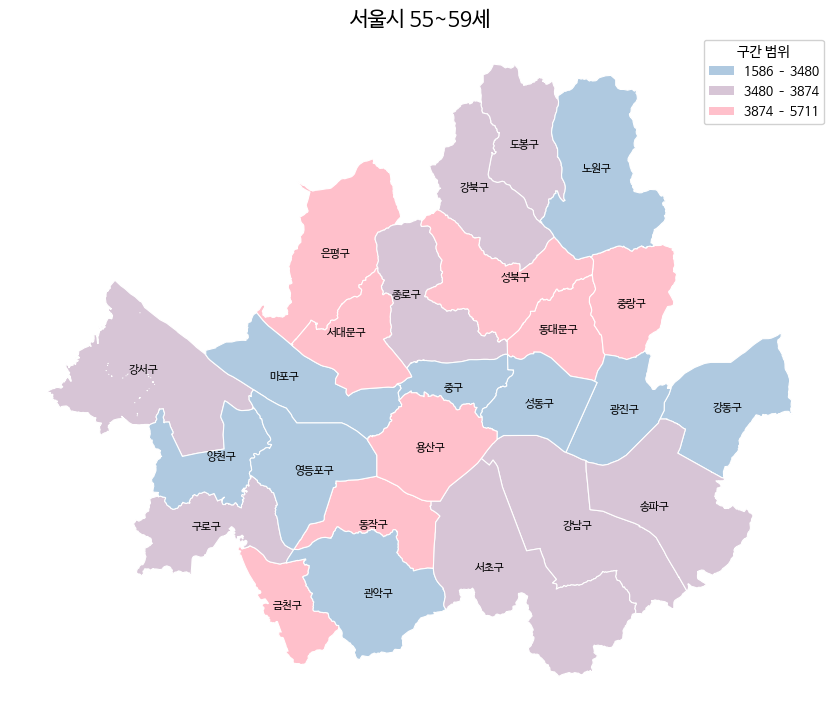

Saved: ./서울시_60_64세.png


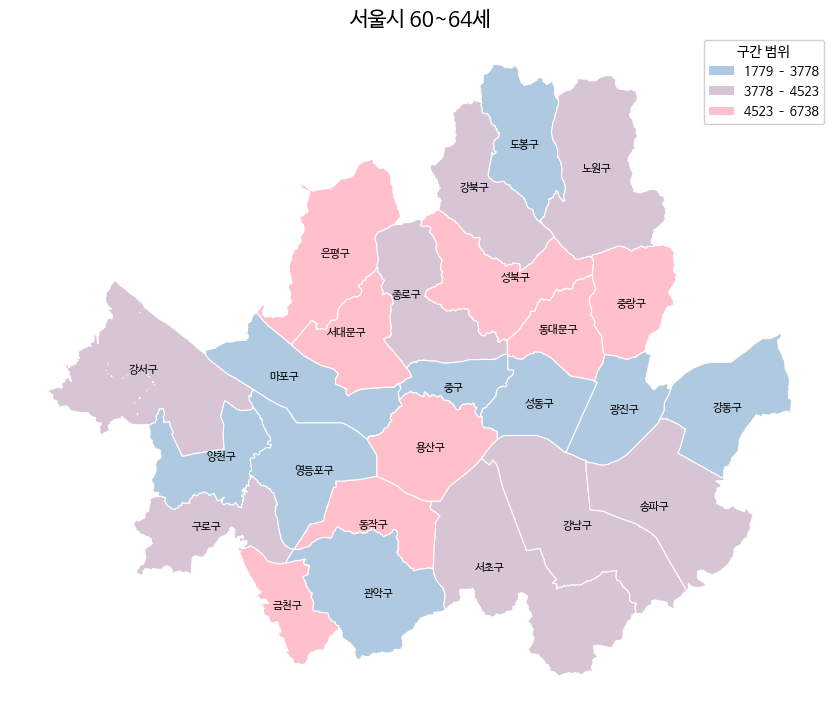

Saved: ./서울시_65_69세.png


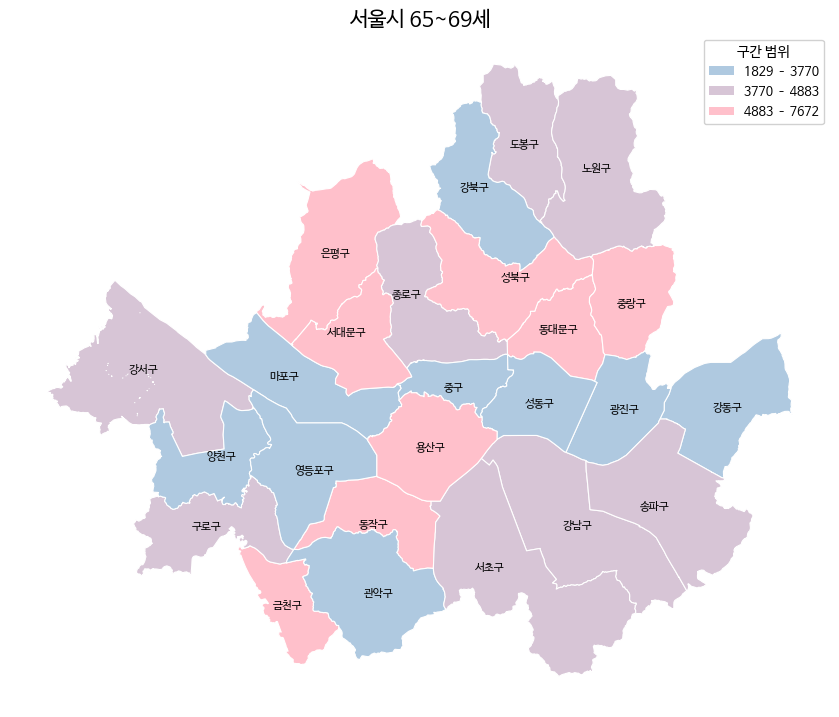

Saved: ./서울시_70_74세.png


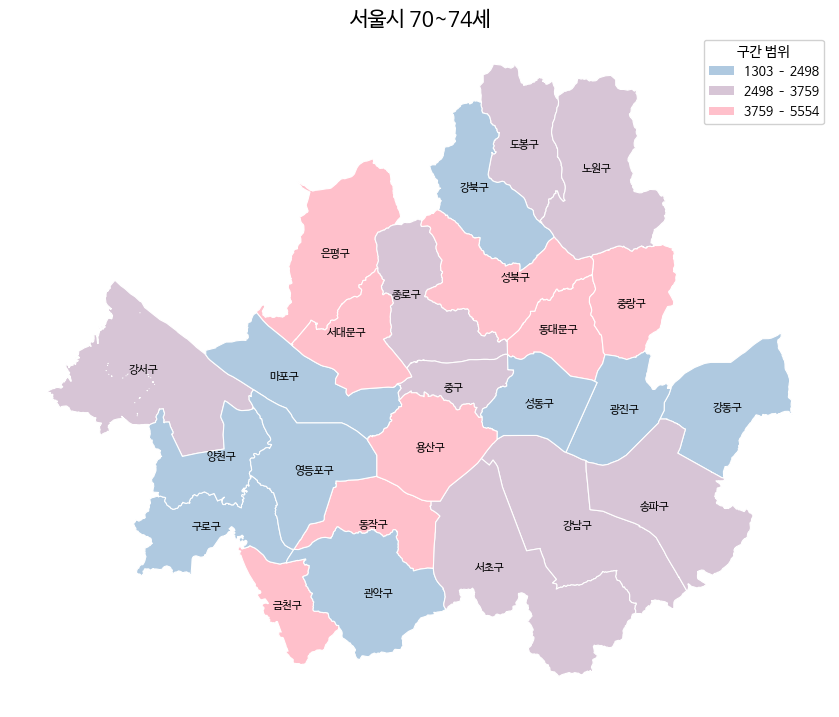

Saved: ./서울시_75_79세.png


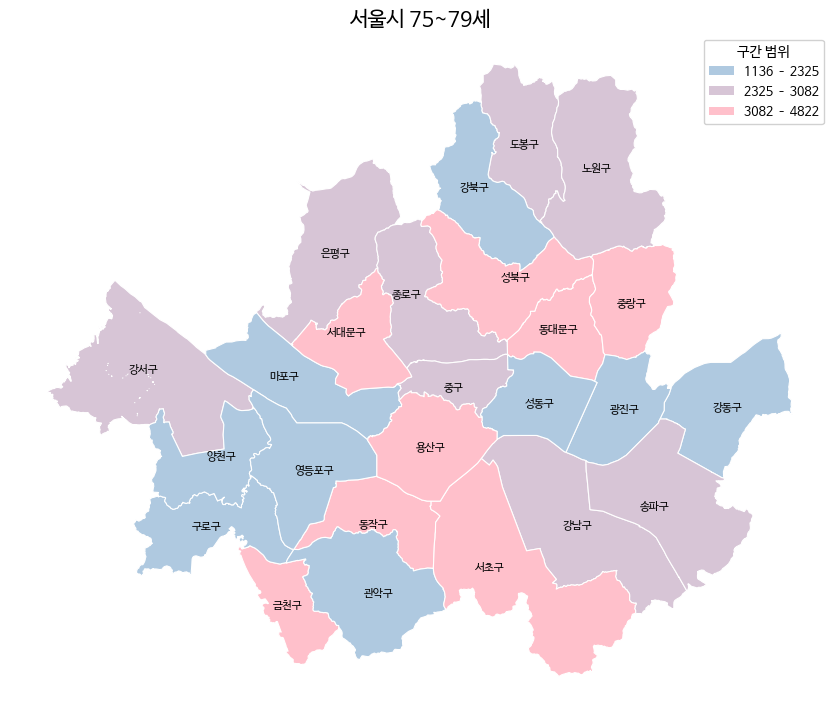

Saved: ./서울시_80_84세.png


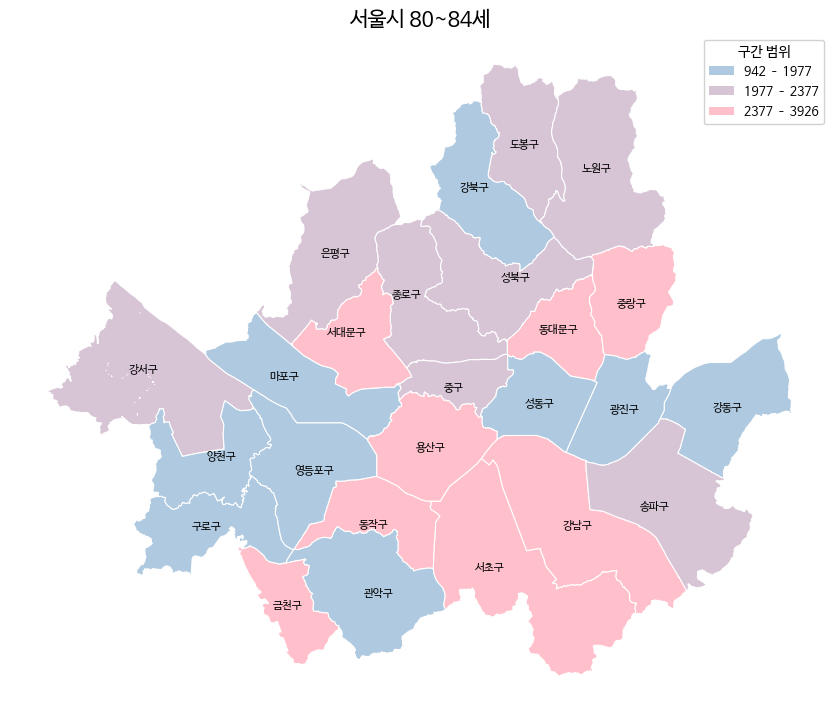

Saved: ./서울시_85세이상.png


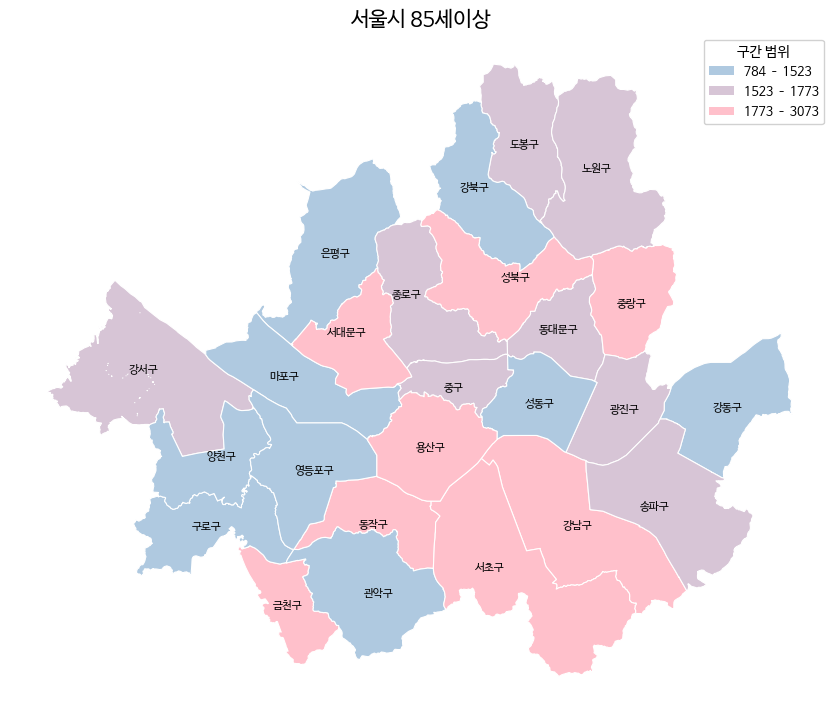

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import mapclassify
import contextily as cx
import re

# 개별 피처 목록
cols = [
    '총합', '20세미만', '20~24세', '25~29세', '30~34세', '35~39세', '40~44세',
       '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세', '75~79세',
       '80~84세', '85세이상']


k = 3                 # 구간 수
save_png = True       # 이미지 파일 저장 여부
out_dir = "./"        # 저장 경로 (필요시 변경)

def slugify(s):
    return re.sub(r"[^\w\-]+", "_", s.strip())

for col in cols:
    y = df2[col].values.astype(float)

    # 구간화 (해당 피처 값만으로 5분위)
    q = mapclassify.Quantiles(y[~np.isnan(y)], k=k)
    bins = q.bins

    # bin index (NaN=-1)
    yb = np.full_like(y, -1, dtype=int)
    mask = ~np.isnan(y)
    yb[mask] = np.digitize(y[mask], bins, right=True)

    # 색상 (NaN은 회색)
    colors = [("#dddddd" if idx == -1 else cmap((idx+1)/k)) for idx in yb]

    # ---- 단일 그림 ----
    fig, ax = plt.subplots(figsize=(8.5, 9.5))

    gdf_merged.plot(ax=ax, color=colors, edgecolor="white", linewidth=0.8)

    # 배경지도(선택)
    try:
        cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, alpha=0.45)
    except Exception:
        pass

    # 구 이름 라벨
    for _, row in gdf_merged.iterrows():
        pt = row.geometry.representative_point()
        ax.text(pt.x, pt.y, row["SIG_KOR_NM"], fontsize=8,
                ha="center", va="center", color="black")

    ax.set_title(f"서울시 {col}", fontsize=15)
    ax.axis("off")

    # ---- 구간범위 상자(범례) ----
    low = np.nanmin(y)
    lefts = [low] + list(bins[:-1])
    rights = list(bins)
    rng = (np.nanmax(y) - np.nanmin(y)) if np.isfinite(np.nanmax(y) - np.nanmin(y)) else 0
    fmt = (lambda v: f"{v:.2f}") if rng < 100 else (lambda v: f"{v:.0f}")

    labels = [f"{fmt(L)} – {fmt(R)}" for L, R in zip(lefts, rights)]
    legend_colors = [cmap((i+1)/k) for i in range(k)]
    handles = [Patch(facecolor=legend_colors[i], edgecolor="none", label=labels[i]) for i in range(k)]

    leg = ax.legend(handles=handles, title="구간 범위",
                    loc="upper right", frameon=True, framealpha=0.9,
                    fontsize=9, title_fontsize=10)
    leg.get_frame().set_facecolor("white")

    plt.tight_layout()

    if save_png:
        out_path = f"{out_dir}서울시_{slugify(col)}.png"
        plt.savefig(out_path, dpi=200, bbox_inches="tight")
        print("Saved:", out_path)

    plt.show()
    plt.close(fig)


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import mapclassify
import contextily as cx
import matplotlib.colors as mcolors

# 👉 컬러맵: 하늘색 → 연한 남색(royalblue, 채도 낮춤)
cmap = mcolors.LinearSegmentedColormap.from_list(
    "sky_to_softblue",
    ["skyblue", "pink"]
)

# 개별 저장 설정
save_png = True          # 저장 원치 않으면 False
out_dir = "./"           # 저장 폴더 경로

def slugify(s):
    return re.sub(r"[^\w\-]+", "_", s.strip())

def plot_single_maps(gdf_merged, cols, k=5, with_basemap=True, label_names=True):
    for col in cols:
        y = gdf_merged[col].astype(float).values

        # (지표별 개별) 5분위 구간화
        q = mapclassify.Quantiles(y[~np.isnan(y)], k=k)
        bins = q.bins

        # bin index (NaN=-1)
        yb = np.full_like(y, -1, dtype=int)
        mask = ~np.isnan(y)
        yb[mask] = np.digitize(y[mask], bins, right=True)

        # 색상 (NaN은 회색)
        colors = [("#dddddd" if idx == -1 else cmap((idx+1)/k)) for idx in yb]

        # ---- 단일 플롯 ----
        fig, ax = plt.subplots(figsize=(8.5, 9.5))

        gdf_merged.plot(ax=ax, color=colors, edgecolor="white", linewidth=0.8)

        # 배경지도(선택)
        if with_basemap:
            try:
                cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, alpha=0.45)
            except Exception:
                pass

        # 구 이름 라벨
        if label_names:
            for _, row in gdf_merged.iterrows():
                pt = row.geometry.representative_point()
                ax.text(pt.x, pt.y, row["SIG_KOR_NM"], fontsize=8,
                        ha="center", va="center", color="black")

        ax.set_title(f"서울시 {col}", fontsize=15)
        ax.axis("off")

        # ---- 구간범위 상자(범례) ----
        low = np.nanmin(y)
        lefts = [low] + list(bins[:-1])
        rights = list(bins)
        rng = (np.nanmax(y) - np.nanmin(y)) if np.isfinite(np.nanmax(y) - np.nanmin(y)) else 0
        fmt = (lambda v: f"{v:.2f}") if rng < 100 else (lambda v: f"{v:.0f}")
        labels = [f"{fmt(L)} – {fmt(R)}" for L, R in zip(lefts, rights)]

        legend_colors = [cmap((i+1)/k) for i in range(k)]
        handles = [Patch(facecolor=legend_colors[i], edgecolor="none", label=labels[i]) for i in range(k)]

        leg = ax.legend(handles=handles, title="구간 범위",
                        loc="upper right", frameon=True, framealpha=0.9,
                        fontsize=9, title_fontsize=10)
        leg.get_frame().set_facecolor("white")

        plt.tight_layout()

        if save_png:
            out_path = f"{out_dir}서울시_{slugify(col)}.png"
            plt.savefig(out_path, dpi=220, bbox_inches="tight")
            print("Saved:", out_path)

        plt.show()
        plt.close(fig)

# 실행: df2용 연령대 컬럼들로 개별 파일 생성/표시
age_cols = [
    '20세미만','20~24세','25~29세','30~34세','35~39세','40~44세',
    '45~49세','50~54세','55~59세','60~64세','65~69세','70~74세','75~79세',
    '80~84세','85세이상'
]
plot_single_maps(gdf2, age_cols, k=5, with_basemap=True, label_names=True)


NameError: name 'gdf2' is not defined

⚠️ 서울 25개 구 외 항목 발견(제외됨): ['소계']


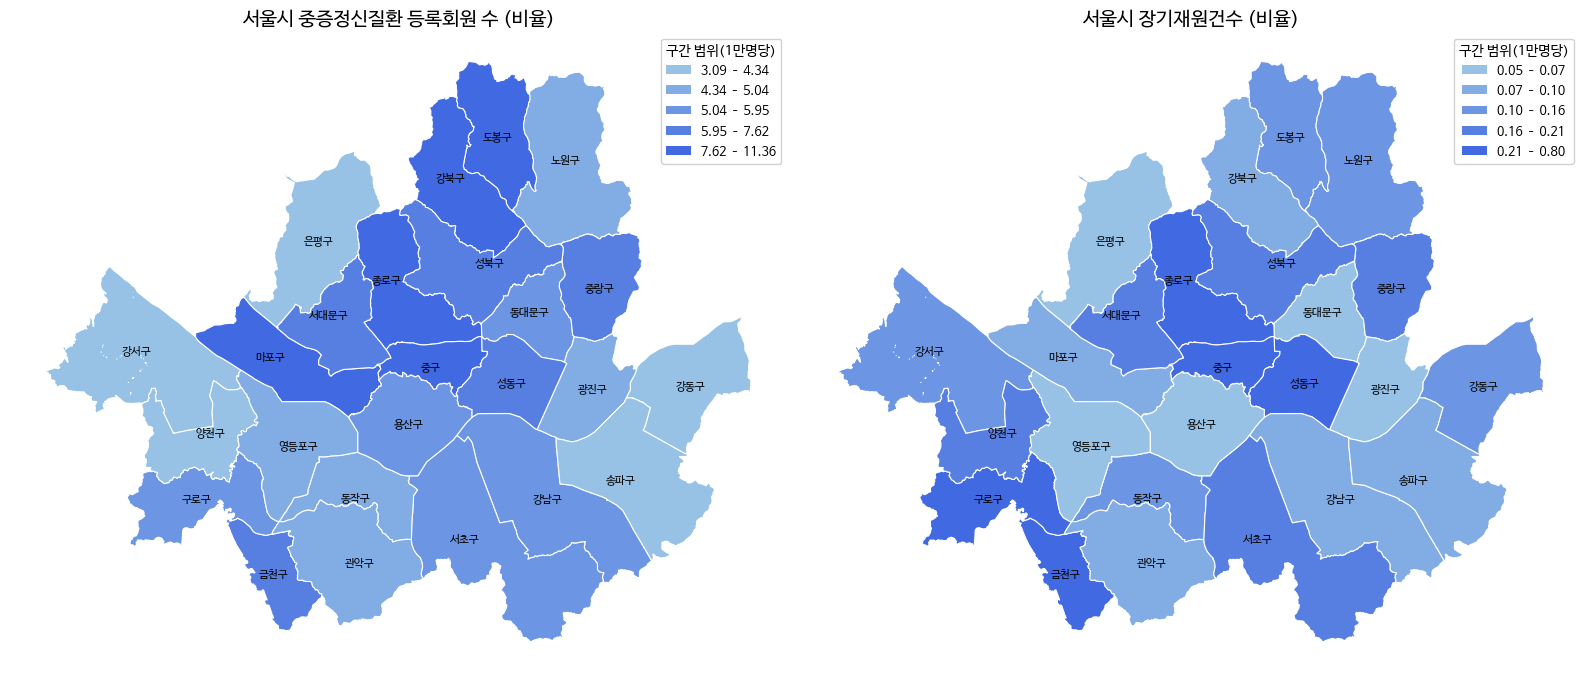

Saved: ./서울시_중증정신질환_1만명당_.png


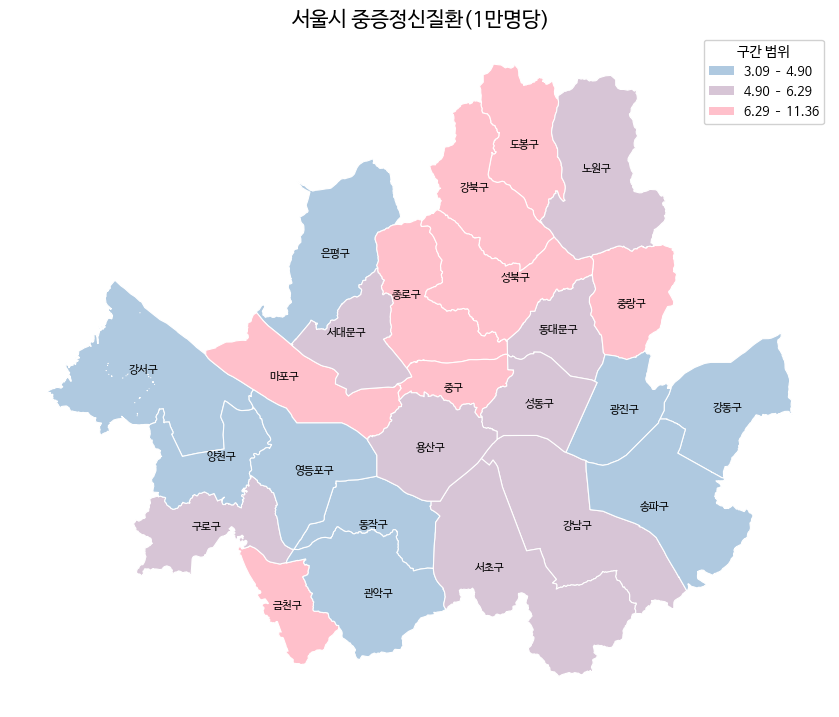

Saved: ./서울시_장기재원_1만명당_.png


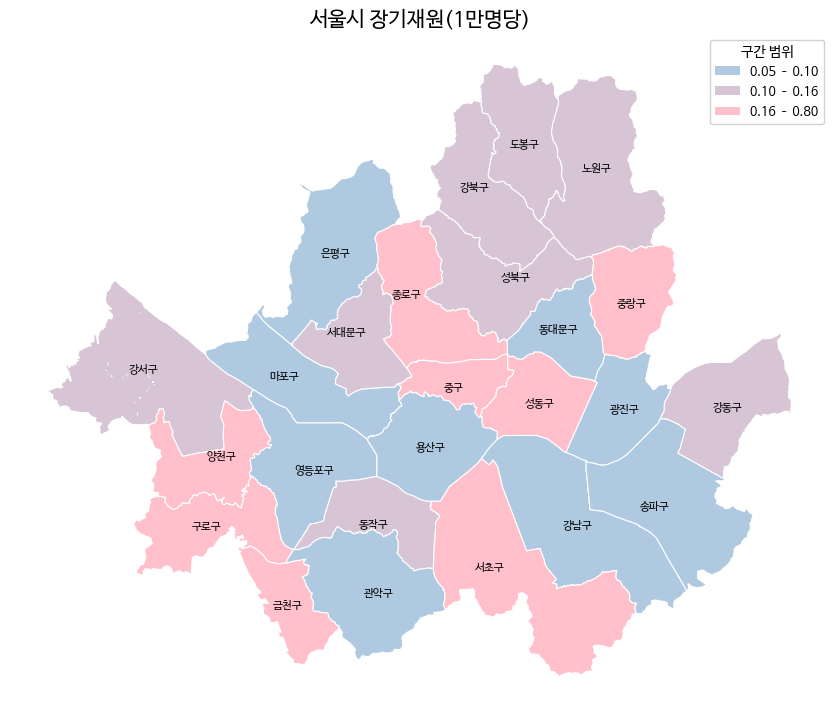

In [ ]:
# =========================================================
# 서울시 1인가구 분석: 인구(등록인구2.csv) 병합 + 1만명당 파생변수 + 지도 시각화
# =========================================================
import re
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import mapclassify
import contextily as cx

# ---------------- 0) 경로 설정 ----------------
FINAL_PATH = "/content/drive/MyDrive/5학년/JBIG/2학기/서울시각화경진대회/최종 데이터셋.csv"   # df_final 원본
POP_PATHS  = [
    "/content/drive/MyDrive/5학년/JBIG/2학기/서울시각화경진대회/등록인구2.csv",
    # (구글드라이브에서 쓰면 이 경로 사용)
    "/content/drive/MyDrive/5학년/JBIG/2학기/서울시각화경진대회/등록인구2.csv",
]

GEO_PATH   = "seoul-maps/juso/2015/json/seoul_municipalities_geo.json"

# ---------------- 1) 데이터 로드 ----------------
# df_final
df_final = pd.read_csv(FINAL_PATH)
df_final["구"] = df_final["ㄱ"].astype(str).str.strip()

# 등록인구2.csv
pop = None
for p in POP_PATHS:
    try:
        pop = pd.read_csv(p)
        break
    except FileNotFoundError:
        continue
    except UnicodeDecodeError:
        pop = pd.read_csv(p, encoding="cp949")
        break
if pop is None:
    raise FileNotFoundError("등록인구2.csv 경로를 확인해주세요. POP_PATHS를 수정하세요.")

# ---- pop 컬럼명 정리 ('구', '총인구')로 표준화 ----
gu_candidates  = ["구","자치구","SIG_KOR_NM","시군구","구명"]
pop_candidates = ["총인구","인구","등록인구","인구수","계","합계"]

gu_col  = next((c for c in gu_candidates if c in pop.columns), None)
pop_col = next((c for c in pop_candidates if c in pop.columns), None)

if gu_col is None:
    # 가장 '구' 같은 텍스트 컬럼(‘구’ 포함 비율)로 추정
    text_cols = [c for c in pop.columns if pop[c].dtype == "object"]
    if not text_cols:
        raise ValueError(f"자치구 컬럼을 찾을 수 없습니다. pop.columns={pop.columns.tolist()}")
    def score_gu(series):
        s = series.fillna("").astype(str).str.contains("구")
        return s.mean()
    gu_col = max(text_cols, key=lambda c: score_gu(pop[c]))

if pop_col is None:
    # 숫자 비율이 높은 컬럼을 인구 컬럼으로 선정
    def to_num(s): return pd.to_numeric(s.astype(str).str.replace(",",""), errors="coerce")
    candidates = [c for c in pop.columns if c != gu_col]
    pop_col = max(candidates, key=lambda c: (to_num(pop[c]).notna().mean(), to_num(pop[c]).sum()))

pop = pop[[gu_col, pop_col]].copy()
pop.columns = ["구", "총인구"]
pop["구"] = pop["구"].astype(str).str.strip()
pop["총인구"] = pd.to_numeric(pop["총인구"].astype(str).str.replace(",",""), errors="coerce")

# ---- 서울 25개 구만 필터 + 중복 합산 ----
seoul25 = [
    "강남구","강동구","강북구","강서구","관악구","광진구","구로구","금천구","노원구","도봉구",
    "동대문구","동작구","마포구","서대문구","서초구","성동구","성북구","송파구","양천구","영등포구",
    "용산구","은평구","종로구","중구","중랑구"
]
extra = sorted(set(pop["구"]) - set(seoul25))
if extra:
    print("⚠️ 서울 25개 구 외 항목 발견(제외됨):", extra)

pop = (pop[pop["구"].isin(seoul25)]
       .groupby("구", as_index=False)["총인구"]
       .sum())

# ---- df_final과 안전 병합 ----
# 이전 잔여 열 정리
df_final = df_final.loc[:, ~df_final.columns.duplicated()].copy()
for c in ["총인구","인구","인구수","등록인구"]:
    if c in df_final.columns:
        df_final = df_final.drop(columns=[c])

df_final["구"] = df_final["구"].astype(str).str.strip()
df_final = df_final.merge(pop, on="구", how="left", validate="one_to_one")

# ---------------- 2) 파생변수(1만명당) 생성 ----------------
den = df_final["총인구"].replace({0: np.nan})

# 원 데이터에 있어야 하는 컬럼 체크
required = ["중증정신질환 등록회원 수", "장기재원건수"]
missing_req = [c for c in required if c not in df_final.columns]
if missing_req:
    raise KeyError(f"df_final에 필요한 컬럼이 없습니다: {missing_req}")

df_final["중증정신질환(1만명당)"] = (pd.to_numeric(df_final["중증정신질환 등록회원 수"], errors="coerce") / den) * 1e4
df_final["장기재원(1만명당)"]     = (pd.to_numeric(df_final["장기재원건수"], errors="coerce") / den) * 1e4

# ---------------- 3) 경계 데이터 병합 ----------------
gdf = gpd.read_file(GEO_PATH)
gdf_merged = gdf.merge(df_final, left_on="SIG_KOR_NM", right_on="구", how="left")

# 좌표계(배경지도용 3857)
if gdf_merged.crs is None:
    gdf_merged = gdf_merged.set_crs(epsg=4326)
if gdf_merged.crs.to_epsg() != 3857:
    gdf_merged = gdf_merged.to_crs(epsg=3857)

# ---------------- 4) 스타일/팔레트 ----------------
plt.rcParams["font.family"] = "NanumBarunGothic"   # 환경에 따라 Malgun Gothic / AppleGothic
plt.rcParams["axes.unicode_minus"] = False

# (A) 하늘색 → 연한 남색(royalblue, 채도 낮춤)
cmap_softblue = mcolors.LinearSegmentedColormap.from_list("sky_to_softblue", ["lightblue", "#4169E1"])
# (B) 하늘색 → 핑크 (원하면 이걸로 바꿔도 됨)
cmap_skypink  = mcolors.LinearSegmentedColormap.from_list("sky_to_pink", ["skyblue", "pink"])

# ---------------- 5) 1×2 지도(컬러바 X, 구간범위 상자 O, 라벨 O) ----------------
def plot_two_maps(gdfm, cols, titles=None, cmap=cmap_softblue, k=5, with_basemap=True, label_names=True):
    if titles is None: titles = cols
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    axes = axes.ravel()

    for ax, col, ttl in zip(axes, cols, titles):
        y = gdfm[col].astype(float).values
        valid = ~np.isnan(y)

        # Quantiles 구간 경계
        q = mapclassify.Quantiles(y[valid], k=k)
        bins = q.bins

        # bin index (NaN=-1)
        yb = np.full_like(y, -1, dtype=int)
        yb[valid] = np.digitize(y[valid], bins, right=True)

        # 색상 (NaN은 회색)
        colors = [("#dddddd" if idx == -1 else cmap((idx+1)/k)) for idx in yb]

        # 지도
        gdfm.plot(ax=ax, color=colors, edgecolor="white", linewidth=0.8)

        # 배경지도
        if with_basemap:
            try:
                cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, alpha=0.45)
            except Exception:
                pass

        # 라벨
        if label_names:
            for _, row in gdfm.iterrows():
                pt = row.geometry.representative_point()
                ax.text(pt.x, pt.y, row["SIG_KOR_NM"], fontsize=8, ha="center", va="center", color="black")

        ax.set_title(ttl, fontsize=14)
        ax.axis("off")

        # ---- 구간범위 상자(범례) ----
        low = np.nanmin(y)
        lefts = [low] + list(bins[:-1])
        rights = list(bins)
        rng = (np.nanmax(y) - np.nanmin(y)) if np.isfinite(np.nanmax(y) - np.nanmin(y)) else 0
        fmt = (lambda v: f"{v:.2f}") if rng < 100 else (lambda v: f"{v:.1f}")
        labels = [f"{fmt(L)} – {fmt(R)}" for L, R in zip(lefts, rights)]

        legend_colors = [cmap((i+1)/k) for i in range(k)]
        handles = [Patch(facecolor=legend_colors[i], edgecolor="none", label=labels[i]) for i in range(k)]
        leg = ax.legend(handles=handles, title="구간 범위(1만명당)",
                        loc="upper right", frameon=True, framealpha=0.9,
                        fontsize=9, title_fontsize=10)
        leg.get_frame().set_facecolor("white")

    plt.tight_layout()
    plt.show()

# 실행 (1×2)
plot_two_maps(
    gdf_merged,
    cols   = ["중증정신질환(1만명당)", "장기재원(1만명당)"],
    titles = ["서울시 중증정신질환 등록회원 수 (비율)", "서울시 장기재원건수 (비율)"],
    cmap   = cmap_softblue,   # 원하면 cmap_skypink로 교체
    k      = 5,
    with_basemap=True,
    label_names=True
)

# ---------------- 6) (선택) 피처별 단일 지도로 각각 저장하고 싶을 때 ----------------
import os
SAVE_PNG = False         # 저장하려면 True
OUT_DIR  = "./"          # 저장 폴더

def slugify(s): return re.sub(r"[^\w\-]+", "_", s.strip())

def plot_single_maps(gdfm, cols, cmap=cmap_softblue, k=3, with_basemap=True, label_names=True,
                     save_png=SAVE_PNG, out_dir=OUT_DIR):
    for col in cols:
        y = gdfm[col].astype(float).values
        q = mapclassify.Quantiles(y[~np.isnan(y)], k=k)
        bins = q.bins

        yb = np.full_like(y, -1, dtype=int)
        mask = ~np.isnan(y)
        yb[mask] = np.digitize(y[mask], bins, right=True)
        colors = [("#dddddd" if idx == -1 else cmap((idx+1)/k)) for idx in yb]

        fig, ax = plt.subplots(figsize=(8.5, 9.5))
        gdfm.plot(ax=ax, color=colors, edgecolor="white", linewidth=0.8)

        if with_basemap:
            try:
                cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, alpha=0.45)
            except Exception:
                pass

        if label_names:
            for _, row in gdfm.iterrows():
                pt = row.geometry.representative_point()
                ax.text(pt.x, pt.y, row["SIG_KOR_NM"], fontsize=8,
                        ha="center", va="center", color="black")

        ax.set_title(f"서울시 {col}", fontsize=15)
        ax.axis("off")

        # 범례(구간범위 상자)
        low = np.nanmin(y)
        lefts = [low] + list(bins[:-1])
        rights = list(bins)
        rng = (np.nanmax(y) - np.nanmin(y)) if np.isfinite(np.nanmax(y) - np.nanmin(y)) else 0
        fmt = (lambda v: f"{v:.2f}") if rng < 100 else (lambda v: f"{v:.0f}")
        labels = [f"{fmt(L)} – {fmt(R)}" for L, R in zip(lefts, rights)]
        legend_colors = [cmap((i+1)/k) for i in range(k)]
        handles = [Patch(facecolor=legend_colors[i], edgecolor="none", label=labels[i]) for i in range(k)]
        leg = ax.legend(handles=handles, title="구간 범위",
                        loc="upper right", frameon=True, framealpha=0.9,
                        fontsize=9, title_fontsize=10)
        leg.get_frame().set_facecolor("white")

        plt.tight_layout()
        if save_png:
            os.makedirs(out_dir, exist_ok=True)
            out_path = f"{out_dir}서울시_{slugify(col)}.png"
            plt.savefig(out_path, dpi=220, bbox_inches="tight")
            print("Saved:", out_path)
        plt.show()
        plt.close(fig)


plot_single_maps(gdf_merged, ["중증정신질환(1만명당)", "장기재원(1만명당)"], cmap=cmap_skypink, save_png=True)
